<div style="text-align: right">INFO 6105 Data Science Eng Methods and Tools, Lecture 7 Day 2</div>
<div style="text-align: right">Dino Konstantopoulos, 23 October 2019, with material from J. Nunez-Iglesias and L.R. Varshney</div>

- For office hours (T 4-5P, W/R 5-6P, please call 617 373 5103 when you get to the 5th floor of Dana building, and I will come and open the door for you. That door is closed. Don't know why. Students hounding professors?

I didn't specify how to plot the graph of your beautiful face, so I went exploring for papers that print complex graphs, and then I thought what a cool way to introduce artificial neural networks (ANNs) by actually plotting real neural networks!

So we continue exploring graph structures with linear algebra, and study a *brain*. We will reproduce results from a scientific paper exploring the [connectome](https://en.wikipedia.org/wiki/Connectome) of a (small) brain, using the linear algebra tools we learned last lecture. To see how useful they are. And to have fun. And to help you plot the graph whose adjacency (weighted) matrix is your beautiful face's ascii art. You do not need to study this paper for your midterm!

<br />
<center>
<img src="images/frankenstein.jpg" width=300 />
    Artificial brain: Prometheus Frankenstein
</center>

<br />
Ok let's start with a less scary graph. The graph below is the graph of Wikipedia. Looks like a brain to me!

<img src="https://upload.wikimedia.org/wikipedia/commons/9/90/Visualization_of_wiki_structure_using_prefuse_visualization_package.png"/>
<!-- caption text="Visualization of wikipedia structure. Created by Chris Davis and released under CC-BY-SA-3.0 (https://commons.wikimedia.org/wiki/GNU_Free_Documentation_License)." -->

# Advanced Linear Algebra: Laplacian matrix of a graph

Remember the **adjacency matrix** from the previous lecture? If you number the nodes of the graph from $0$
to $n-1$, and place a 1 in row $i$, column $j$ of the matrix whenever there is
an edge from node $i$ to node $j$, that's your graph's adjacency matrix. In other words, if we call the adjacency
matrix $A$, then $A_{i, j} = 1$ if and only if the edge $(i, j)$ is in $G$.

The *degree* of a node is the number of edges touching it. For
example, if a node is connected to five other nodes in a graph, its degree
is 5. In adjacency matrix terms, the degree corresponds to the *sum*
of the values in a row or column. If the graph is not directed, the adjacency matrix is symmetrix (its transpose is the matrix itself). If the graph is directed, then you have **in-degrees** and **out-degrees**.

The [**Laplacian**](https://en.wikipedia.org/wiki/Laplacian_matrix) matrix of a graph is defined
as the **degree matrix**, $D$, which
contains the degree of each node along the diagonal and zero everywhere else,
minus the adjacency matrix $A$:

$
L = D - A
$

### Fiedler vector

Let's start with the **blueprint** for a brain. How do you draw nodes and edges in such a way that you don't get a complete
mess? If you try plotting it with `networkx`, guaranteed you get a complete mess every time you redraw.

One way is to ***put nodes that share many edges close together***. And that is essentially what the paper that we are going to study does.

It turns out
that this can be done by using the *second-smallest eigenvalue* of the Laplacian
matrix, and its corresponding eigenvector, which is so important it has its
own name: the [Fiedler vector](https://en.wikipedia.org/wiki/Algebraic_connectivity#The_Fiedler_vector). You see, the dominant eigenvector is not the only important eigenvector of a matrix. 

The magnitude of the eigenvalue of the Fielder eigenvector ***reflects how well connected overall the graph is***.

Specifically:
* This eigenvalue is greater than 0 if and only if G is a [connected graph](https://en.wikipedia.org/wiki/Connectivity_(graph_theory). This is a corollary to the fact that ***the number of times 0 appears as an eigenvalue in the Laplacian is the number of connected components in the graph***
* The magnitude of this value reflects how well connected the overall graph is. 

</br >
<center>
<img src="images/lemur.png" width=300 />
    Really?
</center>

Let's use a minimal network to illustrate this. We start by creating an adjacency matrix:

In [1]:
import numpy as np
A = np.array([[0, 1, 1, 0, 0, 0],
              [1, 0, 1, 0, 0, 0],
              [1, 1, 0, 1, 0, 0],
              [0, 0, 1, 0, 1, 1],
              [0, 0, 0, 1, 0, 1],
              [0, 0, 0, 1, 1, 0]], dtype=float)
A

array([[0., 1., 1., 0., 0., 0.],
       [1., 0., 1., 0., 0., 0.],
       [1., 1., 0., 1., 0., 0.],
       [0., 0., 1., 0., 1., 1.],
       [0., 0., 0., 1., 0., 1.],
       [0., 0., 0., 1., 1., 0.]])

Please output it here below in 0s and 1s with no space in between (hint: use code from last lecture):

In [2]:
for i in range(6):
    row = []
    for el in A[i]:
        row.append(int(round(el)))
    deg = np.sum(row)
    print(''.join(str(i) for i in row).replace(' ', '').replace('\n', '') + ' ' + str(deg))

011000 2
101000 2
110100 3
001011 3
000101 2
000110 2


<div style="display:none;">
for i in range(6):
    row = []
    for el in A[i]:
        row.append(int(round(el)))
    deg = np.sum(row)
    print(''.join(str(i) for i in row).replace(' ', '').replace('\n', '') + ' ' + str(deg))
</div>  

We can use `networkx` to draw this network. First, we initialize matplotlib as usual:

In [9]:
# Make plots appear inline, set custom plotting style
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('style/elegant.mplstyle')
#plt.style.use('~/.matplotlib/stylelib/<my-custom-style>.mplstyle')
plt.figure(figsize=(10,5))

OSError: 'style/elegant.mplstyle' not found in the style library and input is not a valid URL or path; see `style.available` for list of available styles

Now let's plot it with `nx.spring_layout`:

/Users/ramesh0101/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:563: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/Users/ramesh0101/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: 
The is_numlike function was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use isinstance(..., numbers.Number) instead.
  if cb.is_numlike(alpha):


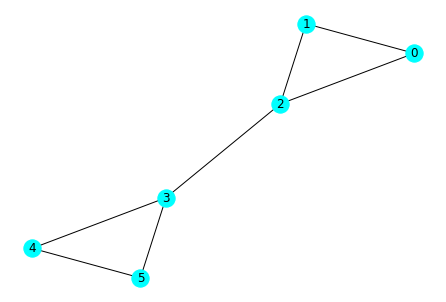

In [13]:
import networkx as nx
g = nx.from_numpy_matrix(A)
layout = nx.spring_layout(g, pos=nx.circular_layout(g))
nx.draw(g, pos=layout,
        with_labels=True, node_color='cyan')

(wow, now you can also plot the graph of your pretty face...)

You can see that the nodes fall naturally into two groups: (0, 1, 2) and (3, 4, 5).
Can the Fiedler vector tell us this? First, we must compute the **degree matrix**
and the **Laplacian**. 

We first get the degrees by summing along either axis of $A$.
(Either axis works because $A$ is symmetric.)

In [18]:
d = np.sum(A, axis=0)
print(d)

[2. 2. 3. 3. 2. 2.]


We then put those degrees into a diagonal matrix of the same shape
as A, the *degree matrix*. We can use the `np.diag` function to do this.

We did this exercise in our ecology graph, remember?

In [19]:
D = np.diag(d)
print(D)

[[2. 0. 0. 0. 0. 0.]
 [0. 2. 0. 0. 0. 0.]
 [0. 0. 3. 0. 0. 0.]
 [0. 0. 0. 3. 0. 0.]
 [0. 0. 0. 0. 2. 0.]
 [0. 0. 0. 0. 0. 2.]]


Finally, we get the Laplacian from the definition:

In [20]:
L = D - A
print(L)

[[ 2. -1. -1.  0.  0.  0.]
 [-1.  2. -1.  0.  0.  0.]
 [-1. -1.  3. -1.  0.  0.]
 [ 0.  0. -1.  3. -1. -1.]
 [ 0.  0.  0. -1.  2. -1.]
 [ 0.  0.  0. -1. -1.  2.]]


Because $L$ is symmetric, we can use the `np.linalg.eigh` function (returns the eigenvalues and eigenvectors of a Hermitian or symmetric matrix, see [here](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.linalg.eigh.html)) to compute
the eigenvalues and eigenvectors:

In [21]:
val, Vec = np.linalg.eigh(L)
val, Vec

(array([2.91433544e-16, 4.38447187e-01, 3.00000000e+00, 3.00000000e+00,
        3.00000000e+00, 4.56155281e+00]),
 array([[-0.40824829,  0.46470513,  0.12545571,  0.69255756, -0.29657753,
          0.18452409],
        [-0.40824829,  0.46470513, -0.5627829 , -0.51508781, -0.03596233,
          0.18452409],
        [-0.40824829,  0.26095647,  0.43732719, -0.17746975,  0.33253985,
         -0.6571923 ],
        [-0.40824829, -0.26095647,  0.43732719, -0.17746975,  0.33253985,
          0.6571923 ],
        [-0.40824829, -0.46470513, -0.52639611,  0.38564378,  0.39688706,
         -0.18452409],
        [-0.40824829, -0.46470513,  0.08906892, -0.20817404, -0.72942692,
         -0.18452409]]))

You can verify that the values returned satisfy the definition of eigenvalues
and eigenvectors. For example, one of the eigenvalues is 3.

- Marvel at this ***neat*** pythonic expression for verifying that a list contains a value very close to something we're after:

In [24]:
# isn't this a neat pythonic expression for verifying that a list contains a value very close to something we know?
np.any(np.isclose(val, 3))

True

And we can check that multiplying the matrix $L$ by the corresponding eigenvector
does indeed multiply the vector by 3:

In [25]:
idx_lambda3 = np.argmin(np.abs(val - 3))
print(idx_lambda3)
v3 = Vec[:, idx_lambda3]

print(v3)
print(L @ v3)
print(3 * v3)

3
[ 0.69255756 -0.51508781 -0.17746975 -0.17746975  0.38564378 -0.20817404]
[ 2.07767267 -1.54526343 -0.53240924 -0.53240924  1.15693135 -0.62452211]
[ 2.07767267 -1.54526343 -0.53240924 -0.53240924  1.15693135 -0.62452211]


In [26]:
print(idx_lambda3)
v3 = Vec[:, idx_lambda3]
print(v3)
print(Vec[0, idx_lambda3])

3
[ 0.69255756 -0.51508781 -0.17746975 -0.17746975  0.38564378 -0.20817404]
0.6925575563260059


Ok, great.

As mentioned above, the **Fiedler vector** is the vector corresponding to the
second-smallest eigenvalue of $L$. Sorting the eigenvalues tells us which one
is the *second-smallest*:

[2.91433544e-16 4.38447187e-01 3.00000000e+00 3.00000000e+00
 3.00000000e+00 4.56155281e+00]


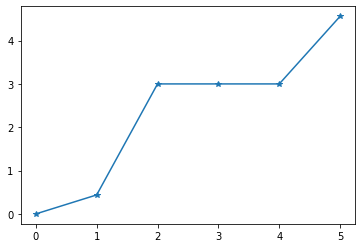

In [37]:
val2 = np.sort(val)
print(val2)
plt.plot(val2, linestyle='-', marker='*');

<!-- caption text="Eigenvalues of $L$" -->

It's the first non-zero eigenvalue, close to 0.4. The Fiedler vector is the
corresponding eigenvector. These are its components:

[ 0.46470513  0.46470513  0.26095647 -0.26095647 -0.46470513 -0.46470513]


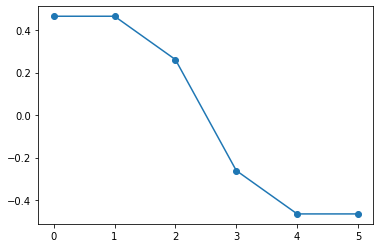

In [38]:
f = Vec[:, np.argsort(val)[1]]
print(f)
plt.plot(f, linestyle='-', marker='o');

<!-- caption text="Fiedler vector of $L$" -->

Just by looking at the *sign* of the elements of the Fiedler
vector, we can separate the nodes into the two groups we identified in the
drawing. 

That's pretty remarkable!

/Users/ramesh0101/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:563: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/Users/ramesh0101/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: 
The is_numlike function was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use isinstance(..., numbers.Number) instead.
  if cb.is_numlike(alpha):


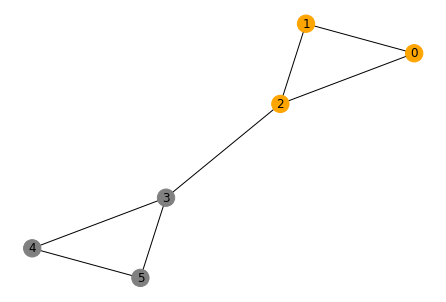

In [15]:
colors = ['orange' if eigv > 0 else 'gray' for eigv in f]
nx.draw(g, pos=layout, with_labels=True, node_color=colors)

</br >
<center>
<img src="images/lemur.png" width=300 />
    (speechless)
</center>

Right?!

Now, ready for a *real* network?

<!-- caption text="Nodes colored by their sign in the Fiedler vector of $L$" -->

# Laplacians with brain data

Armed with this newly acquired knowledge, and since we're getting close to building artificial neural networks with `scikit-learn`, we need to learn a bit more about how neurons are ***configured***. 

Let's demonstrate this process in a real-world example by laying out a worm's brain cells (one of the simplest brains in our animal kingdom), as shown in Figure 2
from the
[Varshney *et al* paper](http://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1001066)
(information on
how to do this is in the
[supplementary material](http://journals.plos.org/ploscompbiol/article/asset?unique&id=info:doi/10.1371/journal.pcbi.1001066.s001)
for the paper).

Yes, I know, you wanted Frankenstein, but you *never start with a big program*. You start with a *small program*, right?

</br >
<center>
<img src="images/worm.png" width=300 />
</center>


To obtain Varshney's layout of the worm brain neurons, they used a related matrix, the
**degree-normalized Laplacian**.

Because the order of the neurons is important in this analysis, we will use a
preprocessed dataset, rather than do complex data cleansing. The original data is on Varshney's
[website](http://www.ifp.illinois.edu/~varshney/elegans),
and the processed data is on blackboard.

First, load the data. There are four components:
- The network of chemical synapses, through which a *pre-synaptic neuron*
  sends a **chemical** signal to a *post-synaptic* neuron (chem-network.npy),
- The gap junction network, which contains direct **electrical** contacts between
  neurons) (gap-network.npy),
- The neuron IDs (names) (neurons.npy), and
- The three neuron types (neuron-types.npy):
  - *sensory neurons*, those that detect signals coming from the outside world,
    encoded as 0;
  - *motor neurons*, those that activate muscles, enabling the worm to move,
    encoded as 2; and
  - *interneurons*, the neurons in between, which enable complex signal processing
    to occur between sensory neurons and motor neurons, encoded as 1.
    
These are the most important figures in the paper. Here is Figure 1, scatter pairs plots:

<br />
<center>
<img src="images/worm-fig1.png" width=900 />
    Figure 1. Adjacency matrices for the gap junction network (blue circles) and the chemical synapse network (red points) with neurons grouped by category (sensory neurons, interneurons, motor neurons)
</center>

<br />
And here are the two views of Figure 2:

<br />
<center>
<img src="images/worm-fig2.png" width=900 />
    Figure 2. The C. elegans wiring diagram is a network of identifiable, labeled neurons connected by chemical and electrical synapses
</center>

<br />
Here's a [neuron](https://en.wikipedia.org/wiki/Neuron). Chemical transmission happens in the synapses. Electrical transmission happens in the axon. For worms and humans alike!
    
</br >
<center>
<img src="images/neuron.png" width=500 />
</center>

<br />
Let's load the data and do some data science.

A `.npy` file is a `NumPy` **array file**. You load the array in a `.npy` file by using 
```python
np.load('filename.npy')
```

In [17]:
!pwd

/Users/ramesh0101/Desktop/DSEM_Lectures/DSEM/Lecture7/Lecture7Day3


In [39]:
import numpy as np
Chem = np.load('data/chem-network.npy')
Gap = np.load('data/gap-network.npy')
neuron_ids = np.load('data/neurons.npy')
neuron_types = np.load('data/neuron-types.npy')

Let's simplify the network, adding the two kinds of connections together,
and removing the directionality of the network by taking the average of
in-connections and out-connections of neurons (adding by the transpose of the adjacency matrix, and then dividing by 2 achieves this):
```python
(A + A.T) / 2
```

Why? Since we are only looking for the *layout* of the neurons on a graph, we
only care about *whether* neurons are connected, not in which direction.

We are going to call the resulting matrix the **connectivity matrix**, $C$, which
is just a different kind of **adjacency matrix**.

In [40]:
A = Chem + Gap
C = (A + A.T) / 2
print(A,C)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] [[0.  0.  0.  ... 0.  0.  0. ]
 [0.  0.  0.5 ... 0.  0.  0. ]
 [0.  0.5 0.  ... 0.  0.  0. ]
 ...
 [0.  0.  0.  ... 0.  0.  0. ]
 [0.  0.  0.  ... 0.  0.  0. ]
 [0.  0.  0.  ... 0.  0.  0. ]]


To get the Laplacian matrix $L$, we need the degree matrix $D$, which contains
the degree of node i at position [i, i], and zeros everywhere else.

In [20]:
degrees = np.sum(C, axis=0)
D = np.diag(degrees)

Now, we can get the Laplacian just like before:

In [21]:
L = D - C
np.shape(L)

(279, 279)

Let's do some **exploratory data analysis** (EDA):

In [49]:
import matplotlib.pyplot as plt
from scipy.sparse import coo_matrix

def plot_coo_matrix(m):
    if not isinstance(m, coo_matrix):
        m = coo_matrix(m)
    fig, ax = plt.subplots(figsize=(10, 5))
    #fig = plt.figure()
    #fig = plt.figure(figsize=(2,1))
    # you may have to replace 'axisbg' below with 'facecolor', depending on the version of your matplotlib
    ax = fig.add_subplot(111, facecolor='black') #axisbg='b')
    ax.plot(m.col, m.row, 's', color='white', ms=1)
    ax.set_xlim(0, m.shape[1])
    ax.set_ylim(0, m.shape[0])
    ax.set_aspect('equal')
    for spine in ax.spines.values():
        spine.set_visible(False)
    ax.invert_yaxis()
    ax.set_aspect('equal')
    ax.set_xticks([])
    ax.set_yticks([])
    return ax

/Users/ramesh0101/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


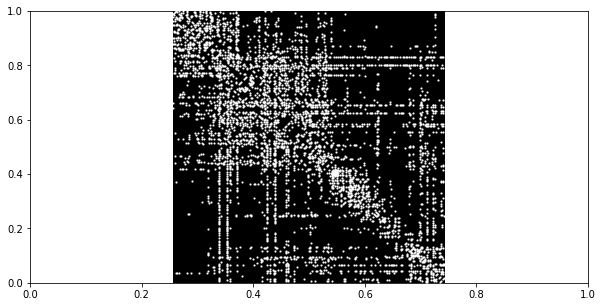

In [50]:
ax = plot_coo_matrix(C)
ax.figure.show()

So, what are some of the conclusions you can make by looking at this brain? How about this:

* Neurons appear to like to connect to nearby neurons (dense diagonal)
* But when a neuron connects to far-away neurons, it connects *a ton* to all other neurons (horizontal and vertical lines)

Let's do some virtual surgery and take some brain slices.

</br >
<center>
<img src="images/virtual-brain-surgery.jpg" width=500 />
</center>

/Users/ramesh0101/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


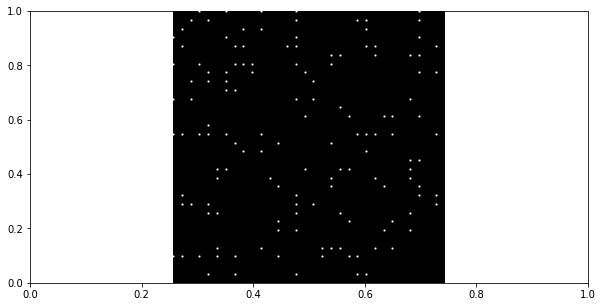

In [51]:
from skimage.util.shape import view_as_blocks
B = view_as_blocks(C, block_shape=(31, 31))  #why 31? Ask the authors..

B00 = B[0, 0] #the top-left 31x31 block
ax = plot_coo_matrix(B00)
ax.figure.show()

In [52]:
# from last lecture
for i in range(31):
    row = []
    for el in B00[i]:
        row.append(int(round(el)))
    deg = np.sum(row)
    print(''.join(str(i) for i in row).replace(' ', '').replace('\n', '') + ' ' + str(deg))

0002004000100050000000000000200 14
0000400000000060000002100000100 14
0000000000200000000000400000000 6
2000001000000020000000000000000 5
0400000120000120000000110000001 13
0000000000000000004200000006100 13
4001000120000010001000000000000 10
0000101000000002000000000000104 9
0000202000000000000000000000000 4
0000000000000000000000000000000 0
1020000000000000100000000000000 4
0000000000000000000000000000000 0
0000000000000002000000001100100 5
0000100000000000000000000000000 1
5602201000000000000002010000000 19
0000000200002000002000000000000 6
0000000000100000000000100000000 2
0000000000000000000000000008200 10
0000041000000002000020000002000 11
0000020000000000000000000002000 4
0000000000000000002000002000100 5
0200000000000020000000000000001 5
0140100000000000100000000000004 11
0000100000000010000000000001000 3
0000000000001000000020000100000 4
0000000000001000000000001000000 2
0000000000000000000000000000000 0
0000060000000000082200010000000 19
2100010100001000020010000000000 9
0000

Let's rearrange nodes such that, on average, neurons are as close as possible to "just above" their downstream (connected)
neighbors. Varshney _et al_ call this measure **processing depth**, and it's
obtained by solving a linear equation involving the Laplacian. We use
`scipy.linalg.pinv`, the
[pseudoinverse](https://en.wikipedia.org/wiki/Moore%E2%80%93Penrose_pseudoinverse),
to solve it. 

That is because when the dimensions get high (we have 279 here!), there is a ***high probability of matrix degeneracy***. Calculating a pseudo-inverse is safer and faster!

If we denote by $A^+$ the pseudo-inverse (versus $A^{-1}$ for the real inverse), $AA^+$ need not be the general identity matrix, but it maps all column vectors of A to themselves: 

$$AA^+ = A$$

Now, let's use the pseudo-inverse `linalg.pinv` to compute a
vector $z$ that satisfies $L z = b$,
where $b = C \odot \textrm{sign}\left(A - A^T\right) \mathbf{1}$. 

- Why, is in the supplementary material for Varshney *et al*.

So, $z = L^+b$.

In [53]:
from scipy import linalg
b = np.sum(C * np.sign(A - A.T), axis=1) 
z = linalg.pinv(L) @ b

ValueError: shapes (6,6) and (279,) not aligned: 6 (dim 1) != 279 (dim 0)

In order to obtain the degree-normalized Laplacian, $Q$, we need the inverse
square root of the matrix $D$ formed by putting the degree for each node on its diagonal:

In [48]:
Dinv2 = np.diag(1 / np.sqrt(degrees))

NameError: name 'degrees' is not defined

Finally, we are able to extract the $x$ coordinates (so-called **affinity coordinates**) of the neurons to ensure that
highly-connected neurons remain close: the eigenvector of $Q$ corresponding to
its second-smallest eigenvalue (**Fiedler vector**), normalized by the degrees:

In [28]:
Q = Dinv2 @ L @ Dinv2

In [29]:
val, Vec = linalg.eig(Q)

Note from the documentation of `numpy.linalg.eig`:

> "The eigenvalues are not necessarily ordered."

We must therefore sort the eigenvalues and the corresponding eigenvector columns ourselves:

In [30]:
smallest_first = np.argsort(val)
val = val[smallest_first]
Vec = Vec[:, smallest_first]

In [31]:
val

array([-6.7055225e-08+0.j,  1.1612547e-01+0.j,  1.9348745e-01+0.j,
        2.2782962e-01+0.j,  2.6494187e-01+0.j,  2.8061083e-01+0.j,
        3.1124145e-01+0.j,  3.3830547e-01+0.j,  3.5364786e-01+0.j,
        3.6151707e-01+0.j,  3.6549681e-01+0.j,  3.7994489e-01+0.j,
        3.9513263e-01+0.j,  4.0380469e-01+0.j,  4.1093361e-01+0.j,
        4.3729919e-01+0.j,  4.4752380e-01+0.j,  4.5978564e-01+0.j,
        4.6602526e-01+0.j,  4.7838497e-01+0.j,  4.9290702e-01+0.j,
        5.2604061e-01+0.j,  5.2976537e-01+0.j,  5.3720641e-01+0.j,
        5.4116791e-01+0.j,  5.5283564e-01+0.j,  5.5324852e-01+0.j,
        5.6047547e-01+0.j,  5.6888694e-01+0.j,  5.8429003e-01+0.j,
        5.9341657e-01+0.j,  6.0225797e-01+0.j,  6.1065054e-01+0.j,
        6.1778504e-01+0.j,  6.2793016e-01+0.j,  6.3102728e-01+0.j,
        6.3329232e-01+0.j,  6.4234781e-01+0.j,  6.5244657e-01+0.j,
        6.5958232e-01+0.j,  6.6352487e-01+0.j,  6.7938507e-01+0.j,
        6.9307762e-01+0.j,  6.9808680e-01+0.j,  7.0232022e-01+

Now that we found the Fielder eigenvector, we compute the **affinity coordinates**:

In [32]:
x = Dinv2 @ Vec[:, 1]
x

array([ 0.02154611,  0.02182961,  0.0166935 ,  0.01842142,  0.01956592,
        0.02251401,  0.01895585,  0.0124211 ,  0.01771769,  0.01358308,
        0.01611598,  0.0118765 ,  0.01791041,  0.01131233,  0.01986792,
        0.01378849,  0.01146096,  0.02265321,  0.01996974,  0.01998024,
        0.01823632,  0.02168177,  0.01599225,  0.01692317,  0.01478647,
        0.01579606,  0.01159788,  0.02135023,  0.02100625,  0.00968849,
        0.01378198,  0.00951279,  0.0185569 ,  0.02290478,  0.02199842,
        0.02105571, -0.01096086,  0.01494431,  0.0171533 ,  0.01373886,
        0.01728188,  0.00366177,  0.01463244,  0.01047712,  0.00130267,
        0.01632308,  0.01386733, -0.00786199,  0.01507828,  0.0076872 ,
        0.0036556 ,  0.0148336 ,  0.01384241,  0.01462625,  0.01451196,
       -0.0076324 ,  0.01545885,  0.00581732,  0.00235185,  0.00377115,
        0.01262238,  0.01381079,  0.01445303,  0.01304166,  0.01716468,
        0.01098508,  0.00345637,  0.01691685,  0.01313352,  0.01

The reasons for using this vector are complex, but appear in
the paper's supplementary material. The short version is that
choosing this vector minimizes the total length of the links between neurons, and yields pretty graphs that are easier to analyze.

There is one small kink that we must address before proceeding: eigenvectors
are only defined up to a multiplicative constant. This follows simply from the
definition of an eigenvector: suppose $v$ is an eigenvector of the matrix $M$,
with corresponding eigenvalue $\lambda$. Then $\alpha v$ is also an eigenvector
of $M$ for any scalar number $\alpha$,
because $Mv = \lambda v$ implies $M(\alpha v) = \lambda (\alpha v)$.

So, it is
arbitrary whether a software package returns $v$ or $-v$ when asked for the
eigenvectors of $M$. In order to make sure we reproduce the layout from the
Varshney *et al.* paper, we must make sure that the vector is pointing in the
same direction as theirs, rather than the opposite direction. 

So we choose an arbitrary neuron from their Figure 2, and check the sign of `x`
at that position. Reverse the vector it if it doesn't match its sign in Figure 2
of the paper.

In [33]:
vc2_index = np.argwhere(neuron_ids == 'VC02')
if x[vc2_index] < 0:
    x = -x

Now it's just a matter of drawing the nodes and the edges. We color them
according to the type stored in `neuron_types`, using the appealing and
functional "colorblind"
[colorbrewer palette](http://chrisalbon.com/python/seaborn_color_palettes.html):

In [34]:
from matplotlib.colors import ListedColormap
from matplotlib.collections import LineCollection


def plot_connectome(x_coords, y_coords, conn_matrix, *,
                    labels=(), types=None, type_names=('',),
                    xlabel='', ylabel=''):
    """Plot neurons as points connected by lines.

    Neurons can have different types (up to 6 distinct colors).

    Parameters
    ----------
    x_coords, y_coords : array of float, shape (N,)
        The x-coordinates and y-coordinates of the neurons.
    conn_matrix : array or sparse matrix of float, shape (N, N)
        The connectivity matrix, with non-zero entry (i, j) if and only
        if node i and node j are connected.
    labels : array-like of string, shape (N,), optional
        The names of the nodes.
    types : array of int, shape (N,), optional
        The type (e.g. sensory neuron, interneuron) of each node.
    type_names : array-like of string, optional
        The name of each value of `types`. For example, if a 0 in
        `types` means "sensory neuron", then `type_names[0]` should
        be "sensory neuron".
    xlabel, ylabel : str, optional
        Labels for the axes.
    """
    if types is None:
        types = np.zeros(x_coords.shape, dtype=int)
    ntypes = len(np.unique(types))
    colors = plt.rcParams['axes.prop_cycle'][:ntypes].by_key()['color']
    cmap = ListedColormap(colors)

    fig, ax = plt.subplots()

    # plot neuron locations:
    for neuron_type in range(ntypes):
        plotting = (types == neuron_type)
        pts = ax.scatter(x_coords[plotting], y_coords[plotting],
                         c=cmap(neuron_type), s=4, zorder=1)
        pts.set_label(type_names[neuron_type])

    # add text labels:
    for x, y, label in zip(x_coords, y_coords, labels):
        ax.text(x, y, '   ' + label,
                verticalalignment='center', fontsize=3, zorder=2)

    # plot edges
    pre, post = np.nonzero(conn_matrix)
    links = np.array([[x_coords[pre], x_coords[post]],
                      [y_coords[pre], y_coords[post]]]).T
    ax.add_collection(LineCollection(links, color='lightgray',
                                     lw=0.3, alpha=0.5, zorder=0))

    ax.legend(scatterpoints=3, fontsize=6)

    ax.set_xlabel(xlabel, fontsize=8)
    ax.set_ylabel(ylabel, fontsize=8)

    plt.figure(figsize=(20,10))
    plt.show()

Now, let's use that function to plot the neurons:

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


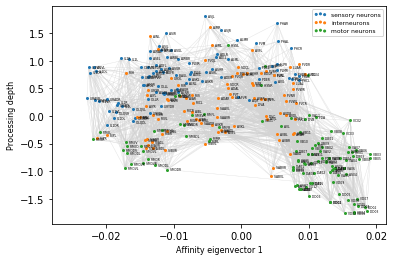

<Figure size 1440x720 with 0 Axes>

In [35]:
# Spectral layout of the neurons of a nematode worm
plot_connectome(x, z, C, labels=neuron_ids, types=neuron_types,
                type_names=['sensory neurons', 'interneurons',
                            'motor neurons'],
                xlabel='Affinity eigenvector 1', ylabel='Processing depth')

That's a worm brain!

As discussed in Varshney's original paper, you can see the top-down processing from
sensory neurons to motor neurons through a network of interneurons. You can
also see two distinct groups of motor neurons: these correspond to the neck
(left) and body (right) body segments of the worm.

How to modify the above code to show the affinity view in Figure 2B from the paper?

In the affinity view, instead of using the processing depth on the y-axis,
we use the normalized third eigenvector of Q, just like we did with x (
invert if necessary, just like with x).

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


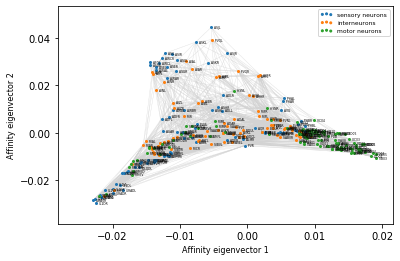

<Figure size 1440x720 with 0 Axes>

In [36]:
y = Dinv2 @ Vec[:, 2]
asjl_index = np.argwhere(neuron_ids == 'ASJL')
if y[asjl_index] < 0:
    y = -y

# Spectral layout of the neurons of a nematode worm, using two spectral dimensions
plot_connectome(x, y, C, labels=neuron_ids, types=neuron_types,
                type_names=['sensory neurons', 'interneurons',
                            'motor neurons'],
                xlabel='Affinity eigenvector 1',
                ylabel='Affinity eigenvector 2')

# Prometheus Frankenstein's brain

Ok, so Prometheus Frankenstein's brain was much larger than the nematode worm's. But Dr. Frankenstein analyzed it with python tools well before they became mainstream, and that's why he was able to create artificial life!

</br >
<center>
<img src="images/frankenbrain.jpg" width=200 />
</center>

But you know what? Now you have the same tools, and ***you can use them for the graph of your pretty face***!

So let's repeat these operations with sparse matrix calculus.

First, we start with the adjacency matrix, A, in a sparse matrix format, in
this case, **CSR** (compressed sparse row), which is the most common format for linear algebra. 

We'll append `s` to the names of all the matrices to indicate that they are **sparse**.

In [37]:
from scipy import sparse
import scipy.sparse.linalg

As = sparse.csr_matrix(A)

Create our connectivity matrix in the same way:

In [38]:
Cs = (As + As.T) / 2

In order to get the degrees matrix, we use the "diags" sparse format, which
stores diagonal and off-diagonal matrices.

In [39]:
degrees = np.ravel(Cs.sum(axis=0))
Ds = sparse.diags(degrees)

Getting the Laplacian is straightforward:

In [40]:
Ls = Ds - Cs

Now we want to get the processing depth. Remember that getting the
pseudo-inverse of the Laplacian matrix for large connectomes is out of the question, because it will
be a dense matrix (the inverse of a sparse matrix is not generally sparse
itself). 

For the nematode worm, we used the pseudo-inverse to compute a
vector $z$ that satisfies $L z = b$,
where $b = C \odot \textrm{sign}\left(A - A^T\right) \mathbf{1}$.

With
dense matrices, we can simply use $z = L^+b$. With sparse ones, we can
use one of the *solvers* (see sidebox, "Solvers") in `sparse.linalg.isolve` to get the `z` vector after
providing `L` and `b`, with no inversion required.

In [41]:
b = Cs.multiply((As - As.T).sign()).sum(axis=1)
z, error = sparse.linalg.isolve.cg(Ls, b, maxiter=10000)

Finally, we must find the eigenvectors of $Q$, the degree-normalized Laplacian,
corresponding to its second and third smallest eigenvalues.

Numerical data in sparse matrices is
in the `.data` attribute. We use that to invert the degrees matrix:

In [42]:
Dsinv2 = Ds.copy()
Dsinv2.data = 1 / np.sqrt(Ds.data)

Finally, we use `scipy`'s sparse linear algebra functions to find the desired
eigenvectors. 

The $Q$ matrix is symmetric, so we can use the `eigsh` function,
specialized for symmetric matrices, to compute them. 

We use the `which` keyword
argument to specify that we want the eigenvectors corresponding to the smallest
eigenvalues, and `k` to specify that we need the 3 smallest:

In [43]:
Qs = Dsinv2 @ Ls @ Dsinv2
vals, Vecs = sparse.linalg.eigsh(Qs, k=3, which='SM')
sorted_indices = np.argsort(vals)
Vecs = Vecs[:, sorted_indices]

Finally, we normalize the eigenvectors to get the x and y coordinates
(and flip these if necessary):

In [44]:
_dsinv, x, y = (Dsinv2 @ Vecs).T
if x[vc2_index] < 0:
    x = -x
if y[asjl_index] < 0:
    y = -y

Note that the eigenvector corresponding to the smallest eigenvalue is always a
vector of all ones. Why? Study [this](http://blog.shriphani.com/2015/04/06/the-smallest-eigenvalues-of-a-graph-laplacian/) paper!

We can now reproduce the above plots!

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


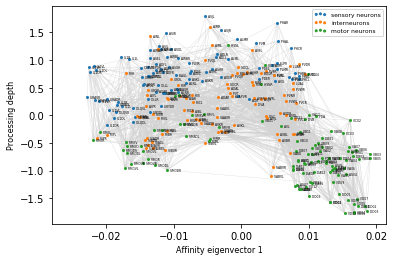

<Figure size 1440x720 with 0 Axes>

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


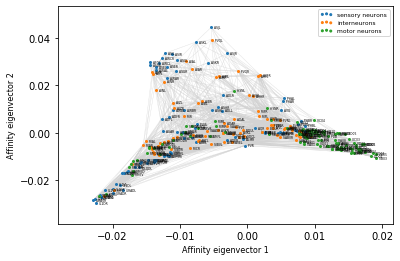

<Figure size 1440x720 with 0 Axes>

In [45]:
# Spectral layout of a nematode brain, computed using sparse matrices
plot_connectome(x, z, C, labels=neuron_ids, types=neuron_types,
                type_names=['sensory neurons', 'interneurons',
                            'motor neurons'],
                xlabel='Affinity eigenvector 1', ylabel='Processing depth')

plot_connectome(x, y, C, labels=neuron_ids, types=neuron_types,
                type_names=['sensory neurons', 'interneurons',
                            'motor neurons'],
                xlabel='Affinity eigenvector 1',
                ylabel='Affinity eigenvector 2')

SciPy has several sparse iterative solvers available, and it is not always
obvious which to use.  Unfortunately, that question also has no easy answer:
different algorithms have different strengths in terms of speed of
convergence, stability, accuracy, and memory use (amongst others).  It is also
not possible to predict, by looking at the input data, which algorithm will
perform best.

Here is a rough guideline for choosing an iterative solver:

> - If A, the input matrix, is symmetric and positive definite, use the
>   Conjugate Gradient solver `cg`.  If A is symmetric, but
>   near-singular or indefinite, try the Minimum Residual iteration
>   method `minres`.
> 
> - For non-symmetric systems, try the Biconjugate Gradient Stabilized
>   method, `bicgstab`.  The Conjugate Gradient Squared method, `cgs`,
>   is a bit faster, but has more erratic convergence.
> 
> - If you need to solve many similar systems, use the LGMRES algorithm `lgmres`.
> 
> - If A is not square, use the least squares algorithm `lsmr`.
> 

For further reading, see:
 
**How Fast are Nonsymmetric Matrix Iterations?**,
Noël M. Nachtigal, Satish C. Reddy, and Lloyd N. Trefethen
SIAM Journal on Matrix Analysis and Applications 1992 13:3, 778-795. https://pdfs.semanticscholar.org/899b/d31c4b9a29b593c31ccbcd4497684eeea864.pdf
 
**Survey of recent Krylov methods**, Jack Dongarra,
http://www.netlib.org/linalg/html_templates/node50.html



### A word about [Krylov](https://en.wikipedia.org/wiki/Krylov_subspace) methods

An intuitive method for finding an eigenvalue (specifically the largest eigenvalue) of a given m × m matrix $A$ is the power iteration that we used last lecture. 

Starting with a **random initial vector** $b$, this method calculates $Ab, \; A^2b, \; A^3b$,… iteratively storing and normalizing the result into $b$ on every turn. This sequence **converges** to the eigenvector corresponding to the largest eigenvalue,$ \lambda _{{1}}$: the **dominant eigenvector**. However, much potentially useful computation is wasted by using only the final result, $A^{n-1}b, \;  A^{{n-1}}b, \; \cdots$. 

If instead, we form the so-called Krylov matrix:

$$K_{n}= \begin{bmatrix}b&Ab&A^{2}b&\cdots &A^{n-1}b\end{bmatrix}$$

The columns of this matrix are not orthogonal, but in principle, we can extract an orthogonal basis, via a method such as [Gram–Schmidt orthogonalization](https://en.wikipedia.org/wiki/Gram%E2%80%93Schmidt_process). 

The resulting set of vectors is an orthogonal basis of the Krylov subspace, $K_{n}$. We may expect the vectors of this basis to give good approximations of the eigenvectors corresponding to the $n$ largest eigenvalues, for the same reason that $A^{{n-1}}b$ approximates the dominant eigenvector.

The process described above is intuitive. Unfortunately, it is also unstable. This is where iterations such as the [Arnoldi iteration](https://en.wikipedia.org/wiki/Arnoldi_iteration) is relevant.

# Conclusion

</br >
<center>
<img src="images/fun.png" width=400 />
</center>

This notebook serves a few purposes. ***First***, to have some fun and introduce you to the magical world of [graph Laplacians](https://samidavies.wordpress.com/2016/09/20/whats-up-with-the-graph-laplacian/). 

Please read [this](https://csustan.csustan.edu/~tom/Clustering/GraphLaplacian-tutorial.pdf) concise introduction for an idea, and [this](http://blog.shriphani.com/2015/04/06/the-smallest-eigenvalues-of-a-graph-laplacian/) blog for the restricted results we studied in this notebook. 

How valuable are these methods? Look [here](https://www.ibm.com/us-en/marketplace/analysts-notebook).

***Second***, to train you in sparse matrix calculus and give you the tools to do some interesting visualizations when we move to `scikit-learn` and artifical neural networks.

***Third***, to help you with your homework and underscore that ***solutions to data science problems does not consist in googling for software packages***. Instead, it is to learn the **math** that solves the problem. And ***then you can look for the software packages for the related math algorithms***. Hint: most of them are in `scipy`. And the probabilistic ones in `scikit-learn` or `pymc3`.

Now you know.

</br >
<center>
<img src="images/moreyouknow.png" width=400 />
</center>

